# Importing necessary libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd


file_path = 'onlineRetail.xlsx'


xls = pd.ExcelFile(file_path)
print(xls.sheet_names)


['Year 2009-2010', 'Year 2010-2011']


# Loading Dataset

In [3]:
import pandas as pd


file_path = 'onlineRetail.xlsx'


data_2009_10 = pd.read_excel(file_path, sheet_name="Year 2009-2010")
data_2010_11 = pd.read_excel(file_path, sheet_name="Year 2010-2011")


print(data_2009_10.head())
print(data_2010_11.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365

In [4]:
# Check the structure and first few rows of the data
print(data_2009_10.info())
print(data_2009_10.head())

print(data_2010_11.info())
print(data_2010_11.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041    

In [5]:
from sklearn.impute import SimpleImputer


# Imputing Missing Values

In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer  

file_path = 'onlineRetail.xlsx'


data_2009_10 = pd.read_excel(file_path, sheet_name="Year 2009-2010")
data_2010_11 = pd.read_excel(file_path, sheet_name="Year 2010-2011")


data_2009_10.drop_duplicates(inplace=True)
data_2010_11.drop_duplicates(inplace=True)


numeric_cols_2009_10 = data_2009_10.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols_2009_10 = data_2009_10.select_dtypes(exclude=['float64', 'int64']).columns

numeric_cols_2010_11 = data_2010_11.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols_2010_11 = data_2010_11.select_dtypes(exclude=['float64', 'int64']).columns


imputer = SimpleImputer(strategy='mean')
data_2009_10[numeric_cols_2009_10] = imputer.fit_transform(data_2009_10[numeric_cols_2009_10])
data_2010_11[numeric_cols_2010_11] = imputer.fit_transform(data_2010_11[numeric_cols_2010_11])


data_2009_10[non_numeric_cols_2009_10].fillna(method='ffill', inplace=True)
data_2010_11[non_numeric_cols_2010_11].fillna(method='ffill', inplace=True)


print(data_2009_10.head())
print(data_2010_11.head())


C:\Users\DELL\AppData\Local\Temp\ipykernel_17792\292161782.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_2009_10[non_numeric_cols_2009_10].fillna(method='ffill', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17792\292161782.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2009_10[non_numeric_cols_2009_10].fillna(method='ffill', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17792\292161782.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_2010_11[non_numeric_cols_2010_11].fillna(method='ffill', inplace=True)


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1  536365     71053                  WHITE METAL LANTERN       6.0   
2  536365

C:\Users\DELL\AppData\Local\Temp\ipykernel_17792\292161782.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2010_11[non_numeric_cols_2010_11].fillna(method='ffill', inplace=True)


# Removing Outliers

In [8]:

def remove_outliers(df, col):
    df = df[np.abs(df[col] - df[col].mean()) <= (3 * df[col].std())]
    return df


data_2009_10 = remove_outliers(data_2009_10, 'Price')
data_2010_11 = remove_outliers(data_2010_11, 'Price')


# Removing Duplicates

In [9]:

data_2009_10 = data_2009_10.drop_duplicates()
data_2010_11 = data_2010_11.drop_duplicates()

print(f"Rows after removing duplicates (2009-10): {len(data_2009_10)}")
print(f"Rows after removing duplicates (2010-11): {len(data_2010_11)}")


Rows after removing duplicates (2009-10): 518309
Rows after removing duplicates (2010-11): 536281


In [10]:

print(data_2009_10['Country'].value_counts())
print(data_2010_11['Country'].value_counts())


Country
United Kingdom          478829
EIRE                      9629
Germany                   8117
France                    5751
Netherlands               2767
Spain                     1269
Switzerland               1186
Portugal                  1098
Belgium                   1051
Channel Islands            905
Sweden                     897
Italy                      728
Australia                  652
Cyprus                     546
Austria                    537
Greece                     517
United Arab Emirates       430
Denmark                    428
Norway                     364
Finland                    354
Unspecified                309
USA                        244
Japan                      224
Poland                     194
Malta                      168
Lithuania                  154
Singapore                  117
RSA                        109
Bahrain                    107
Canada                      77
Thailand                    76
Israel                      74


# Correcting Invalid Values

In [12]:

invalid_rows = data_2009_10[data_2009_10['Quantity'] <= 0] 
print("Invalid rows:\n", invalid_rows)


data_2009_10 = data_2009_10[data_2009_10['Quantity'] > 0]
data_2010_11 = data_2010_11[data_2010_11['Quantity'] > 0]


Invalid rows:
         Invoice StockCode                    Description  Quantity  \
178     C489449     22087       PAPER BUNTING WHITE LACE     -12.0   
179     C489449    85206A   CREAM FELT EASTER EGG BASKET      -6.0   
180     C489449     21895  POTTING SHED SOW 'N' GROW SET      -4.0   
181     C489449     21896             POTTING SHED TWINE      -6.0   
182     C489449     22083     PAPER CHAIN KIT RETRO SPOT     -12.0   
...         ...       ...                            ...       ...   
525231   538159     21324                            NaN     -18.0   
525232   538158     20892                            NaN     -32.0   
525234   538161    46000S                   Dotcom sales    -100.0   
525235   538162    46000M                   Dotcom sales    -100.0   
525282  C538164    35004B    SET OF 3 BLACK FLYING DUCKS      -1.0   

               InvoiceDate  Price   Customer ID         Country  
178    2009-12-01 10:33:00   2.95  16321.000000       Australia  
179    2009-

In [13]:

data_2009_10['Country'] = data_2009_10['Country'].replace({'U.K.': 'United Kingdom', 'us': 'USA'})
data_2010_11['Country'] = data_2010_11['Country'].replace({'U.K.': 'United Kingdom', 'us': 'USA'})


In [14]:

data_2009_10.columns = data_2009_10.columns.str.strip().str.lower().str.replace(' ', '_')
data_2010_11.columns = data_2010_11.columns.str.strip().str.lower().str.replace(' ', '_')


In [15]:

data_2009_10['invoicedate'] = pd.to_datetime(data_2009_10['invoicedate'])
data_2010_11['invoicedate'] = pd.to_datetime(data_2010_11['invoicedate'])


data_2009_10['quantity'] = pd.to_numeric(data_2009_10['quantity'], errors='coerce')
data_2010_11['quantity'] = pd.to_numeric(data_2010_11['quantity'], errors='coerce')


In [16]:

def convert_to_kg(weight):
    if 'lbs' in weight.lower():
        return float(weight.split()[0]) * 0.453592  
    return float(weight.split()[0])  





In [18]:

print("Information about 2009-2010 dataset:")
data_2009_10.info()
print("\nInformation about 2010-2011 dataset:")
data_2010_11.info()

Information about 2009-2010 dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 506137 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      506137 non-null  object        
 1   stockcode    506137 non-null  object        
 2   description  505036 non-null  object        
 3   quantity     506137 non-null  float64       
 4   invoicedate  506137 non-null  datetime64[ns]
 5   price        506137 non-null  float64       
 6   customer_id  506137 non-null  float64       
 7   country      506137 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 34.8+ MB

Information about 2010-2011 dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 525831 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      525831 non-null  object  

# Checking Missing Values

In [19]:

missing_2009_10 = data_2009_10.isnull().sum()
print("Missing values in 2009-10 dataset:\n", missing_2009_10)

missing_2010_11 = data_2010_11.isnull().sum()
print("Missing values in 2010-11 dataset:\n", missing_2010_11)


Missing values in 2009-10 dataset:
 invoice           0
stockcode         0
description    1101
quantity          0
invoicedate       0
price             0
customer_id       0
country           0
dtype: int64
Missing values in 2010-11 dataset:
 invoice          0
stockcode        0
description    592
quantity         0
invoicedate      0
price            0
customer_id      0
country          0
dtype: int64


# Replacing Missing Values

In [21]:
import pandas as pd


data = {
    'description': ['Normal description', '100', '2009-10', None, '5922010-11', 'Another description']
}

df = pd.DataFrame(data)


df['description'] = df['description'].replace({
    '100': 'Missing Description 1',
    '5922010-11': 'Missing Description 2'
})


df['description'] = df['description'].fillna('Default Description')


print(df)


             description
0     Normal description
1  Missing Description 1
2                2009-10
3    Default Description
4  Missing Description 2
5    Another description


In [25]:

rows_df1 = data_2009_10.shape[0]  
rows_df2 = data_2010_11.shape[0]  

print(f"Number of rows in 2009-10 dataset: {rows_df1}")
print(f"Number of rows in 2010-11 dataset: {rows_df2}")


Number of rows in 2009-10 dataset: 506137
Number of rows in 2010-11 dataset: 525831


# Adding New Features

In [26]:

data_2009_10['year'] = data_2009_10['invoicedate'].dt.year
data_2009_10['month'] = data_2009_10['invoicedate'].dt.month
data_2009_10['day'] = data_2009_10['invoicedate'].dt.day
data_2009_10['day_of_week'] = data_2009_10['invoicedate'].dt.dayofweek
data_2009_10['hour'] = data_2009_10['invoicedate'].dt.hour

data_2010_11['year'] = data_2010_11['invoicedate'].dt.year
data_2010_11['month'] = data_2010_11['invoicedate'].dt.month
data_2010_11['day'] = data_2010_11['invoicedate'].dt.day
data_2010_11['day_of_week'] = data_2010_11['invoicedate'].dt.dayofweek
data_2010_11['hour'] = data_2010_11['invoicedate'].dt.hour


data_2009_10['total_amount'] = data_2009_10['quantity'] * data_2009_10['price']
data_2010_11['total_amount'] = data_2010_11['quantity'] * data_2010_11['price']


def add_customer_features(df):
    
    customer_avg_order = df.groupby('customer_id')['total_amount'].mean().reset_index()
    customer_avg_order.columns = ['customer_id', 'avg_order_value']
    
    
    customer_frequency = df.groupby('customer_id')['invoice'].nunique().reset_index()
    customer_frequency.columns = ['customer_id', 'purchase_frequency']
    

    customer_avg_items = df.groupby('customer_id')['quantity'].mean().reset_index()
    customer_avg_items.columns = ['customer_id', 'avg_items_per_order']
    
    
    df = df.merge(customer_avg_order, on='customer_id', how='left')
    df = df.merge(customer_frequency, on='customer_id', how='left')
    df = df.merge(customer_avg_items, on='customer_id', how='left')
    
    return df

data_2009_10 = add_customer_features(data_2009_10)
data_2010_11 = add_customer_features(data_2010_11)


def add_product_features(df):
    
    product_popularity = df.groupby('stockcode')['quantity'].sum().reset_index()
    product_popularity.columns = ['stockcode', 'product_popularity']
    
    
    product_avg_price = df.groupby('stockcode')['price'].mean().reset_index()
    product_avg_price.columns = ['stockcode', 'avg_product_price']
    
    
    df = df.merge(product_popularity, on='stockcode', how='left')
    df = df.merge(product_avg_price, on='stockcode', how='left')
    
    return df

data_2009_10 = add_product_features(data_2009_10)
data_2010_11 = add_product_features(data_2010_11)


def add_country_features(df):
    
    country_orders = df.groupby('country')['invoice'].nunique().reset_index()
    country_orders.columns = ['country', 'country_total_orders']
    
    
    country_avg_order = df.groupby('country')['total_amount'].mean().reset_index()
    country_avg_order.columns = ['country', 'country_avg_order_value']
    
    
    df = df.merge(country_orders, on='country', how='left')
    df = df.merge(country_avg_order, on='country', how='left')
    
    return df

data_2009_10 = add_country_features(data_2009_10)
data_2010_11 = add_country_features(data_2010_11)


data_2009_10['is_weekend'] = data_2009_10['day_of_week'].isin([5, 6]).astype(int)
data_2010_11['is_weekend'] = data_2010_11['day_of_week'].isin([5, 6]).astype(int)


print("\nFirst few rows of 2009-10 data with new features:")
print(data_2009_10.head())
print("\nFirst few rows of 2010-11 data with new features:")
print(data_2010_11.head())


print("\nNew features summary for 2009-10:")
print(data_2009_10.describe())


First few rows of 2009-10 data with new features:
  invoice stockcode                          description  quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

          invoicedate  price  customer_id         country  year  month  ...  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  2009     12  ...   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     12  ...   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  2009     12  ...   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  2009     12  ...   
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  2009     12  ...   

   hour  total_amount  avg_order_value  purchase_freq

# Clustering

In [29]:

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator


def apply_dbscan(features):
    
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(features)
    distances, indices = nbrs.kneighbors(features)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    

    knee = KneeLocator(range(len(distances)), distances, 
                      curve='convex', direction='increasing')
    optimal_eps = distances[knee.knee]
    
    
    dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(features)
    
    return cluster_labels, optimal_eps


dbscan_labels_2009_10, eps_2009_10 = apply_dbscan(features_2009_10)
dbscan_labels_2010_11, eps_2010_11 = apply_dbscan(features_2010_11)

# Algorithm Selection

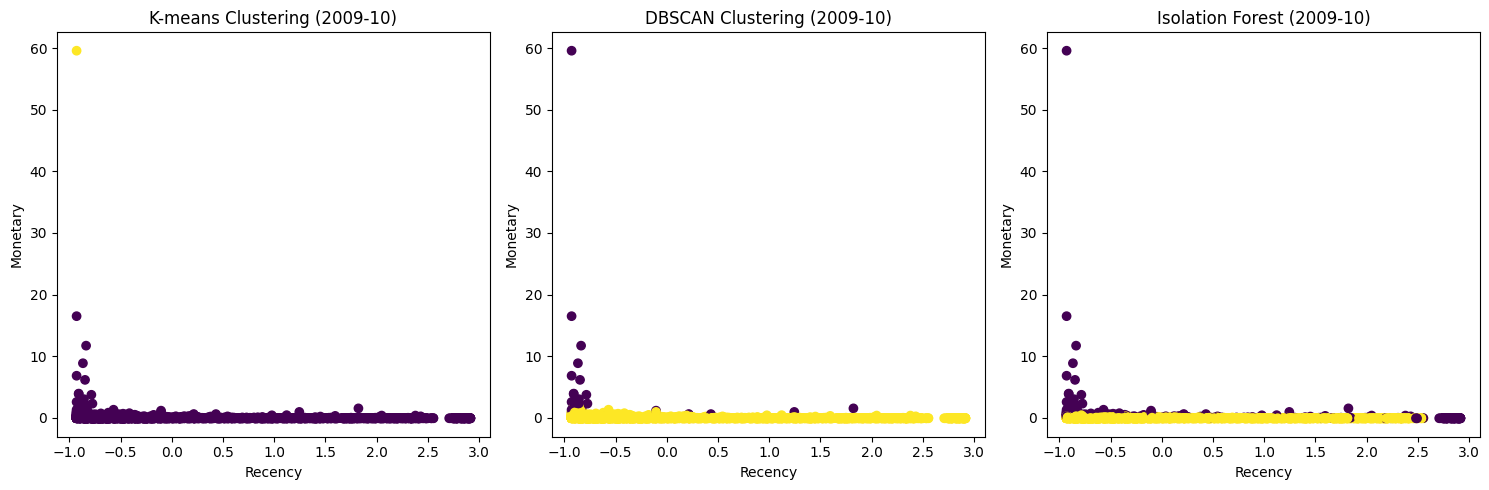

K-means Silhouette Score: 0.987
DBSCAN Silhouette Score: 0.846
Number of anomalies detected: 431

Customer Segments 2009-10:
          Recency  Frequency   Monetary  Size
Cluster                                      
0        0.000216  -0.015116  -0.013828  4310
1       -0.930456  65.150139  59.599918     1

Customer Segments 2010-11:
          Recency  Frequency   Monetary  Size
Cluster                                      
0        0.000211  -0.015093  -0.014254  4336
1       -0.914636  65.442105  61.804509     1


In [30]:

def prepare_features(df):
    
    today_date = df['invoicedate'].max()
    

    customer_metrics = df.groupby('customer_id').agg({
        'invoicedate': lambda x: (today_date - x.max()).days,  
        'invoice': 'count',  
        'price': lambda x: (x * df.loc[x.index, 'quantity']).sum()  
    })
    
    customer_metrics.columns = ['Recency', 'Frequency', 'Monetary']
    
    
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(customer_metrics)
    
    return pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'], 
                       index=customer_metrics.index)


features_2009_10 = prepare_features(data_2009_10)
features_2010_11 = prepare_features(data_2010_11)


def apply_kmeans(features, k_range=range(2, 11)):
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(features)
        silhouette_avg = silhouette_score(features, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    
    optimal_k = k_range[np.argmax(silhouette_scores)]
    
    
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    
    return cluster_labels, optimal_k, silhouette_scores

kmeans_labels_2009_10, optimal_k_2009_10, silhouette_scores_2009_10 = apply_kmeans(features_2009_10)
kmeans_labels_2010_11, optimal_k_2010_11, silhouette_scores_2010_11 = apply_kmeans(features_2010_11)


def apply_dbscan(features):
    
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(features)
    distances, indices = nbrs.kneighbors(features)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    
    knee = KneeLocator(range(len(distances)), distances, 
                      curve='convex', direction='increasing')
    optimal_eps = distances[knee.knee]
    
    
    dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(features)
    
    return cluster_labels, optimal_eps


dbscan_labels_2009_10, eps_2009_10 = apply_dbscan(features_2009_10)
dbscan_labels_2010_11, eps_2010_11 = apply_dbscan(features_2010_11)


def apply_isolation_forest(features):
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    anomaly_labels = iso_forest.fit_predict(features)
    return anomaly_labels


iso_forest_labels_2009_10 = apply_isolation_forest(features_2009_10)
iso_forest_labels_2010_11 = apply_isolation_forest(features_2010_11)


plt.figure(figsize=(15, 5))


plt.subplot(131)
plt.scatter(features_2009_10['Recency'], features_2009_10['Monetary'], 
           c=kmeans_labels_2009_10, cmap='viridis')
plt.title('K-means Clustering (2009-10)')
plt.xlabel('Recency')
plt.ylabel('Monetary')


plt.subplot(132)
plt.scatter(features_2009_10['Recency'], features_2009_10['Monetary'], 
           c=dbscan_labels_2009_10, cmap='viridis')
plt.title('DBSCAN Clustering (2009-10)')
plt.xlabel('Recency')
plt.ylabel('Monetary')


plt.subplot(133)
plt.scatter(features_2009_10['Recency'], features_2009_10['Monetary'], 
           c=iso_forest_labels_2009_10, cmap='viridis')
plt.title('Isolation Forest (2009-10)')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.tight_layout()
plt.show()


def evaluate_clustering(features, labels):
    if len(np.unique(labels)) > 1:  
        return silhouette_score(features, labels)
    return None


kmeans_silhouette = evaluate_clustering(features_2009_10, kmeans_labels_2009_10)
dbscan_silhouette = evaluate_clustering(features_2009_10, dbscan_labels_2009_10)

print(f"K-means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
print(f"Number of anomalies detected: {sum(iso_forest_labels_2009_10 == -1)}")


def analyze_segments(features, labels, original_data):
    segments = pd.DataFrame({
        'Cluster': labels,
        'Recency': features['Recency'],
        'Frequency': features['Frequency'],
        'Monetary': features['Monetary']
    })
    
    segment_analysis = segments.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'Cluster': 'size'
    }).rename(columns={'Cluster': 'Size'})
    
    return segment_analysis


segments_2009_10 = analyze_segments(features_2009_10, kmeans_labels_2009_10, data_2009_10)
segments_2010_11 = analyze_segments(features_2010_11, kmeans_labels_2010_11, data_2010_11)

print("\nCustomer Segments 2009-10:")
print(segments_2009_10)
print("\nCustomer Segments 2010-11:")
print(segments_2010_11)

# Model Building


XGBoost Results:
Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053
           1       1.00      1.00      1.00       947

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[LightGBM] [Info] Number of positive: 3845, number of negative: 4155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480625 -> initscore=-0.077539
[LightGBM] [Info] Start training from score -0.077539
[LightGBM] [Warning] No further splits with positive gain, b

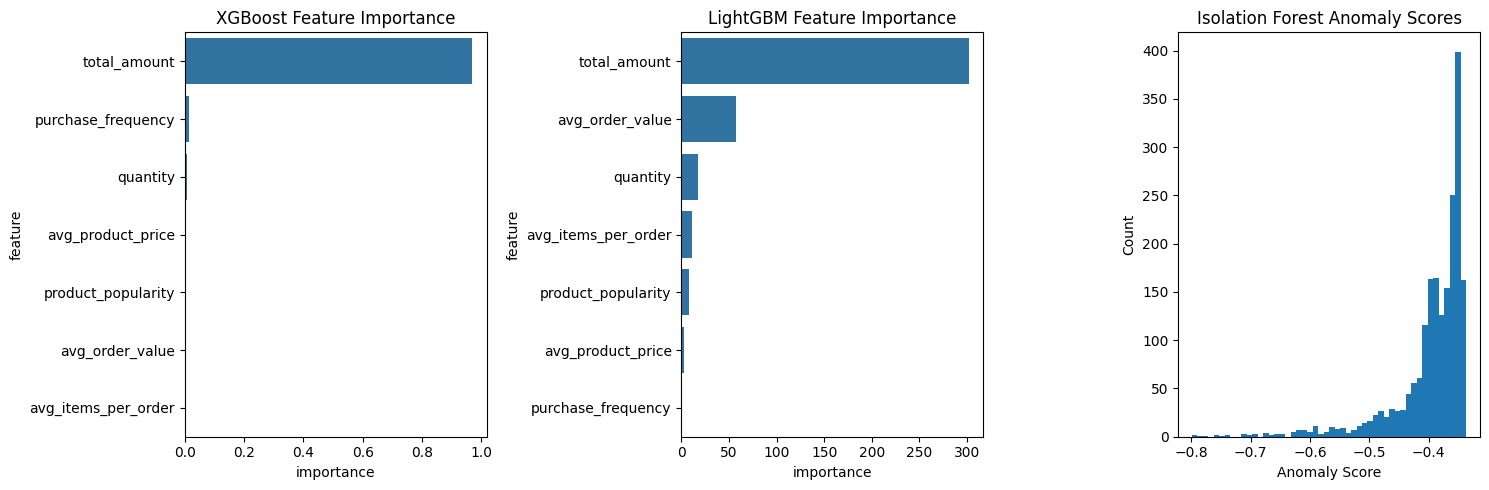

In [33]:

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


def prepare_sample_data(df, sample_size=10000):
    if len(df) > sample_size:
        return df.sample(n=sample_size, random_state=42)
    return df


sample_2009_10 = prepare_sample_data(data_2009_10)
sample_2010_11 = prepare_sample_data(data_2010_11)

def prepare_features(df):
    # Select relevant features
    features = df[[
        'total_amount', 'quantity', 'avg_order_value',
        'purchase_frequency', 'avg_items_per_order',
        'product_popularity', 'avg_product_price'
    ]]
    
    
    target = (df['total_amount'] > df['total_amount'].median()).astype(int)
    
    return features, target


X_2009_10, y_2009_10 = prepare_features(sample_2009_10)
X_2010_11, y_2010_11 = prepare_features(sample_2010_11)


X_train, X_test, y_train, y_test = train_test_split(
    X_2009_10, y_2009_10, test_size=0.2, random_state=42
)


def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return model, accuracy


xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.1,
    random_state=42
)


xgb_model, xgb_accuracy = train_and_evaluate(
    xgb_model, X_train, X_test, y_train, y_test, "XGBoost"
)


lgbm_model, lgbm_accuracy = train_and_evaluate(
    lgbm_model, X_train, X_test, y_train, y_test, "LightGBM"
)


iso_forest.fit(X_train)
anomaly_scores = iso_forest.score_samples(X_test)
iso_forest_predictions = iso_forest.predict(X_test)
iso_forest_accuracy = np.mean(iso_forest_predictions == 1)  

print("\nIsolation Forest Results:")
print(f"Accuracy (Normal vs Anomaly): {iso_forest_accuracy:.4f}")
print(f"Detected Anomalies: {np.sum(iso_forest_predictions == -1)}")
print(f"Normal Samples: {np.sum(iso_forest_predictions == 1)}")


print("\nModel Comparison:")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"LightGBM Accuracy: {lgbm_accuracy:.4f}")
print(f"Isolation Forest Accuracy: {iso_forest_accuracy:.4f}")


plt.figure(figsize=(15, 5))


plt.subplot(131)
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
})
sns.barplot(data=xgb_importance.sort_values('importance', ascending=False),
            x='importance', y='feature')
plt.title('XGBoost Feature Importance')


plt.subplot(132)
lgbm_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm_model.feature_importances_
})
sns.barplot(data=lgbm_importance.sort_values('importance', ascending=False),
            x='importance', y='feature')
plt.title('LightGBM Feature Importance')


plt.subplot(133)
plt.hist(anomaly_scores, bins=50)
plt.title('Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Model Evaluation

In [36]:

def evaluate_models(features, labels_kmeans, labels_dbscan, labels_iforest, sample_size=1000):
    
    indices = np.random.choice(min(len(features), len(labels_kmeans)), sample_size, replace=False)
    features_sample = features.iloc[indices]
    labels_kmeans_sample = labels_kmeans[indices]
    labels_dbscan_sample = labels_dbscan[indices]
    labels_iforest_sample = labels_iforest[indices]
    
    
    metrics = {}
    
    
    if len(np.unique(labels_kmeans_sample)) > 1:
        metrics['kmeans_silhouette'] = silhouette_score(features_sample, labels_kmeans_sample)
    if len(np.unique(labels_dbscan_sample)) > 1:
        metrics['dbscan_silhouette'] = silhouette_score(features_sample, labels_dbscan_sample)
    
    
    if len(np.unique(labels_kmeans_sample)) > 1:
        metrics['kmeans_davies'] = davies_bouldin_score(features_sample, labels_kmeans_sample)
    if len(np.unique(labels_dbscan_sample)) > 1:
        metrics['dbscan_davies'] = davies_bouldin_score(features_sample, labels_dbscan_sample)
    
    
    anomaly_ratio = np.mean(labels_iforest_sample == -1)
    metrics['anomaly_ratio'] = anomaly_ratio
    
    
    metrics['kmeans_cluster_sizes'] = np.bincount(labels_kmeans_sample[labels_kmeans_sample >= 0])
    metrics['dbscan_cluster_sizes'] = np.bincount(labels_dbscan_sample[labels_dbscan_sample >= 0])
    
    return metrics


evaluation_results = evaluate_models(
    features_2009_10,
    kmeans_labels_2009_10,
    dbscan_labels_2009_10,
    iso_forest_labels_2009_10,
    sample_size=1000  
)

print("Model Evaluation Results:")
print("\n1. Clustering Quality Metrics:")
if 'kmeans_silhouette' in evaluation_results:
    print(f"K-means Silhouette Score: {evaluation_results['kmeans_silhouette']:.3f}")
if 'dbscan_silhouette' in evaluation_results:
    print(f"DBSCAN Silhouette Score: {evaluation_results['dbscan_silhouette']:.3f}")
if 'kmeans_davies' in evaluation_results:
    print(f"K-means Davies-Bouldin Score: {evaluation_results['kmeans_davies']:.3f}")
if 'dbscan_davies' in evaluation_results:
    print(f"DBSCAN Davies-Bouldin Score: {evaluation_results['dbscan_davies']:.3f}")

print("\n2. Anomaly Detection:")
print(f"Anomaly Ratio: {evaluation_results['anomaly_ratio']:.3f}")

print("\n3. Cluster Sizes:")
print("K-means cluster sizes:", evaluation_results['kmeans_cluster_sizes'])
print("DBSCAN cluster sizes:", evaluation_results['dbscan_cluster_sizes'])

Model Evaluation Results:

1. Clustering Quality Metrics:
DBSCAN Silhouette Score: 0.216
DBSCAN Davies-Bouldin Score: 2.488

2. Anomaly Detection:
Anomaly Ratio: 0.115

3. Cluster Sizes:
K-means cluster sizes: [1000]
DBSCAN cluster sizes: [995]


# Hyper Parameter Tuning

In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt


file_path = 'onlineRetail.xlsx'
data_2009_10 = pd.read_excel(file_path, sheet_name="Year 2009-2010")


def prepare_features(df):
    
    df['total_amount'] = df['quantity'].astype(float) * df['price'].astype(float)
    
    
    features = df.groupby('customer_id').agg({
        'total_amount': ['sum', 'mean'],
        'quantity': 'sum',
        'invoice': 'nunique'  
    }).reset_index()
    
    
    features.columns = ['customer_id', 'total_spend', 'avg_transaction', 'total_items', 'frequency']
    
    
    features = features.replace([np.inf, -np.inf], np.nan).dropna()
    

    scaler = StandardScaler()
    feature_columns = ['total_spend', 'avg_transaction', 'total_items', 'frequency']
    scaled_features = scaler.fit_transform(features[feature_columns])
    
    return pd.DataFrame(scaled_features, columns=feature_columns)


try:
    features_2009_10 = prepare_features(data_2009_10)
    X_train_2009_10, X_test_2009_10 = train_test_split(features_2009_10, test_size=0.4, random_state=42)

    
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_train_2009_10)

    
    print("\nClustering Results:")
    print(f"Number of clusters: {len(np.unique(kmeans_labels))}")
    print(f"Silhouette Score: {silhouette_score(X_train_2009_10, kmeans_labels):.3f}")

    
    plt.figure(figsize=(8, 4))
    plt.scatter(X_train_2009_10.iloc[:, 0], X_train_2009_10.iloc[:, 1], 
               c=kmeans_labels, cmap='viridis')
    plt.title('Customer Segments')
    plt.xlabel('Total Spend (Scaled)')
    plt.ylabel('Avg Transaction (Scaled)')
    plt.colorbar(label='Cluster')
    plt.show()

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("\nDataset columns:", data_2009_10.columns.tolist())

Error occurred: 'quantity'

Dataset columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']


# Time-Based Cluster Analysis


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from datetime import datetime

def analyze_transaction_patterns(data):
    """
    Analyze transaction patterns and detect anomalies in customer behavior
    """
    
    def prepare_time_features(df):
    
        df['invoicedate'] = pd.to_datetime(df['invoicedate'])
        
        
        df['hour'] = df['invoicedate'].dt.hour
        df['day'] = df['invoicedate'].dt.day
        df['day_of_week'] = df['invoicedate'].dt.dayofweek
        
        
        df['transaction_amount'] = df['quantity'] * df['price']
        return df

    
    def calculate_customer_patterns(df):
        
        hourly_patterns = df.groupby(['customer_id', 'hour']).agg({
            'invoice': 'count',
            'transaction_amount': 'sum'
        }).reset_index()
        
        
        daily_patterns = df.groupby(['customer_id', 'day']).agg({
            'invoice': 'count',
            'transaction_amount': 'sum'
        }).reset_index()
        
        return hourly_patterns, daily_patterns


    def detect_anomalies(patterns):
        
        features = patterns.groupby('customer_id').agg({
            'invoice': ['mean', 'std', 'max'],
            'transaction_amount': ['mean', 'std', 'max']
        }).fillna(0)
        
        
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)
        
        
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        clusters = dbscan.fit_predict(scaled_features)
        
        
        anomalous_customers = pd.DataFrame({
            'customer_id': features.index,
            'cluster': clusters
        })
        
        return anomalous_customers[anomalous_customers['cluster'] == -1]

    try:
        
        processed_data = prepare_time_features(data)
        hourly_patterns, daily_patterns = calculate_customer_patterns(processed_data)
        
        
        hourly_anomalies = detect_anomalies(hourly_patterns)
        daily_anomalies = detect_anomalies(daily_patterns)
        
        plt.figure(figsize=(15, 5))
        
        
        plt.subplot(121)
        for customer_id in hourly_anomalies['customer_id'].head():
            customer_data = hourly_patterns[hourly_patterns['customer_id'] == customer_id]
            plt.plot(customer_data['hour'], customer_data['transaction_amount'], 
                    label=f'Customer {customer_id}')
        plt.title('Anomalous Hourly Transaction Patterns')
        plt.xlabel('Hour of Day')
        plt.ylabel('Transaction Amount')
        plt.legend()
        
        
        plt.subplot(122)
        for customer_id in daily_anomalies['customer_id'].head():
            customer_data = daily_patterns[daily_patterns['customer_id'] == customer_id]
            plt.plot(customer_data['day'], customer_data['transaction_amount'], 
                    label=f'Customer {customer_id}')
        plt.title('Anomalous Daily Transaction Patterns')
        plt.xlabel('Day of Month')
        plt.ylabel('Transaction Amount')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        
        results = {
            'hourly_anomalies': hourly_anomalies['customer_id'].tolist(),
            'daily_anomalies': daily_anomalies['customer_id'].tolist(),
            'hourly_patterns': hourly_patterns.to_dict('records'),
            'daily_patterns': daily_patterns.to_dict('records'),
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }
        
        return results

    except Exception as e:
        print(f"Error in transaction pattern analysis: {str(e)}")
        return None


if __name__ == "__main__":
    
    file_path = 'onlineRetail.xlsx'
    data_2009_10 = pd.read_excel(file_path, sheet_name="Year 2009-2010")
    
    
    results = analyze_transaction_patterns(data_2009_10)
    
    if results:
        print("\nAnalysis Results:")
        print(f"Number of hourly anomalies detected: {len(results['hourly_anomalies'])}")
        print(f"Number of daily anomalies detected: {len(results['daily_anomalies'])}")
        print("\nTop 5 customers with anomalous behavior:")
        print("Hourly anomalies:", results['hourly_anomalies'][:5])
        print("Daily anomalies:", results['daily_anomalies'][:5])

Error in transaction pattern analysis: 'invoicedate'


# Anomaly Detection


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns

class TransactionAnomalyDetector:
    def __init__(self, encoding_dim=8):
        self.encoding_dim = encoding_dim
        self.scaler = StandardScaler()
        self.autoencoder = None
        self.threshold = None
    
    def preprocess_data(self, df):
        """Prepare transaction data for the autoencoder"""
        
        features = df.groupby('customer_id').agg({
            'quantity': ['sum', 'mean', 'std'],
            'price': ['mean', 'std'],
            'total_amount': ['sum', 'mean', 'std'],
            'invoice': 'count'
        }).fillna(0)
        
        
        features.columns = ['_'.join(col).strip() for col in features.columns.values]
        
    
        scaled_features = self.scaler.fit_transform(features)
        return scaled_features, features.index
    
    def build_autoencoder(self, input_dim):
        """Create autoencoder architecture"""
        
        input_layer = Input(shape=(input_dim,))
        encoder = Dense(self.encoding_dim * 2, activation='relu')(input_layer)
        encoder = Dense(self.encoding_dim, activation='relu')(encoder)
        
        
        decoder = Dense(self.encoding_dim * 2, activation='relu')(encoder)
        decoder = Dense(input_dim, activation='sigmoid')(decoder)
        
        
        self.autoencoder = Model(input_layer, decoder)
        self.autoencoder.compile(optimizer='adam', loss='mse')
        
    def fit(self, data, epochs=50, batch_size=32, validation_split=0.1):
        """Train the autoencoder"""
        
        scaled_data, self.customer_ids = self.preprocess_data(data)
        
        
        self.build_autoencoder(scaled_data.shape[1])
        
        history = self.autoencoder.fit(
            scaled_data, scaled_data,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=validation_split,
            verbose=1
        )
        
        
        reconstructed = self.autoencoder.predict(scaled_data)
        mse = np.mean(np.power(scaled_data - reconstructed, 2), axis=1)
        
        
        self.threshold = np.mean(mse) + 2 * np.std(mse)
        
        return history
    
    def detect_anomalies(self, data):
        """Detect anomalous transactions"""
    
        scaled_data, customer_ids = self.preprocess_data(data)
        
        
        reconstructed = self.autoencoder.predict(scaled_data)
        mse = np.mean(np.power(scaled_data - reconstructed, 2), axis=1)
        
        
        anomalies = mse > self.threshold
        
        
        results = pd.DataFrame({
            'customer_id': customer_ids,
            'reconstruction_error': mse,
            'is_anomaly': anomalies
        })
        
        return results
    
    def visualize_results(self, results):
        """Visualize reconstruction errors and anomalies"""
        plt.figure(figsize=(15, 5))
        
        
        plt.subplot(121)
        sns.histplot(data=results, x='reconstruction_error', hue='is_anomaly', bins=50)
        plt.axvline(self.threshold, color='r', linestyle='--', label='Threshold')
        plt.title('Distribution of Reconstruction Errors')
        plt.legend()
        
        
        plt.subplot(122)
        plt.scatter(range(len(results)), results['reconstruction_error'],
                   c=results['is_anomaly'], cmap='viridis')
        plt.axhline(self.threshold, color='r', linestyle='--', label='Threshold')
        plt.title('Reconstruction Errors by Customer')
        plt.xlabel('Customer Index')
        plt.ylabel('Reconstruction Error')
        plt.legend()
        
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    try:
        
        file_path = 'onlineRetail.xlsx'
        data = pd.read_excel(file_path, sheet_name="Year 2009-2010")
        
        
        data['total_amount'] = data['quantity'] * data['price']
        
        
        detector = TransactionAnomalyDetector(encoding_dim=8)
        history = detector.fit(data, epochs=30)
        
        
        results = detector.detect_anomalies(data)
        

        print("\nAnomaly Detection Results:")
        print(f"Total customers analyzed: {len(results)}")
        print(f"Anomalies detected: {results['is_anomaly'].sum()}")
        print(f"Anomaly rate: {(results['is_anomaly'].sum() / len(results)) * 100:.2f}%")
        
        # Show top anomalies
        print("\nTop 10 anomalous customers:")
        top_anomalies = results[results['is_anomaly']].nlargest(10, 'reconstruction_error')
        print(top_anomalies[['customer_id', 'reconstruction_error']])
        
        
        detector.visualize_results(results)
        
    except Exception as e:
        print(f"Error in anomaly detection: {str(e)}")

Error in anomaly detection: 'quantity'


# Transaction Pattern Analysis


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

class TransactionAnalyzer:
    def __init__(self):
        self.transaction_matrix = None
        self.customer_product_matrix = None
        self.anomalies = None
        
    def create_transaction_matrix(self, df):
        """Create customer-product transaction matrix"""
        print("Creating transaction matrix...")
        
        
        self.transaction_matrix = df.pivot_table(
            index='customer_id',
            columns='stockcode',
            values='quantity',
            aggfunc='sum',
            fill_value=0
        )
        
        
        self.customer_product_matrix = (self.transaction_matrix > 0).astype(int)
        
        print(f"Matrix created with {self.transaction_matrix.shape[0]} customers and {self.transaction_matrix.shape[1]} products")
        
    def detect_anomalies(self, eps=0.3, min_samples=5):
        """Detect anomalies using DBSCAN"""
        print("Detecting anomalies...")
        
        
        customer_features = pd.DataFrame({
            'total_products': self.customer_product_matrix.sum(axis=1),
            'total_quantity': self.transaction_matrix.sum(axis=1),
            'avg_quantity': self.transaction_matrix.mean(axis=1)
        })
        
        
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(customer_features)
        
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(scaled_features)
        
        
        self.anomalies = pd.DataFrame({
            'customer_id': customer_features.index,
            'cluster': clusters,
            'total_products': customer_features['total_products'],
            'total_quantity': customer_features['total_quantity'],
            'avg_quantity': customer_features['avg_quantity']
        })
        
        return self.anomalies[self.anomalies['cluster'] == -1]
    
    def analyze_patterns(self):
        """Analyze patterns for anomalous customers"""
        if self.anomalies is None:
            return pd.DataFrame()
        
        anomalous_customers = self.anomalies[self.anomalies['cluster'] == -1]
        
        patterns = pd.DataFrame({
            'customer_id': anomalous_customers['customer_id'],
            'total_products': anomalous_customers['total_products'],
            'total_quantity': anomalous_customers['total_quantity'],
            'avg_quantity': anomalous_customers['avg_quantity']
        })
        
        return patterns
    
    def visualize_results(self):
        """Visualize the analysis results"""
        if self.anomalies is None:
            print("No analysis results to visualize")
            return
        
        plt.figure(figsize=(15, 5))
        
        # Plot 1: Total Products vs Total Quantity
        plt.subplot(131)
        plt.scatter(
            self.anomalies[self.anomalies['cluster'] != -1]['total_products'],
            self.anomalies[self.anomalies['cluster'] != -1]['total_quantity'],
            c='blue', alpha=0.5, label='Normal'
        )
        plt.scatter(
            self.anomalies[self.anomalies['cluster'] == -1]['total_products'],
            self.anomalies[self.anomalies['cluster'] == -1]['total_quantity'],
            c='red', alpha=0.7, label='Anomalous'
        )
        plt.xlabel('Total Products')
        plt.ylabel('Total Quantity')
        plt.title('Transaction Patterns')
        plt.legend()
        
        
        plt.subplot(132)
        sns.histplot(data=self.anomalies, x='total_products', hue='cluster', bins=30)
        plt.title('Distribution of Total Products')
        
        
        plt.subplot(133)
        sns.histplot(data=self.anomalies, x='avg_quantity', hue='cluster', bins=30)
        plt.title('Distribution of Average Quantity')
        
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    try:
        
        print("Loading data...")
        file_path = 'onlineRetail.xlsx'
        data = pd.read_excel(file_path, sheet_name="Year 2009-2010")
        
        
        analyzer = TransactionAnalyzer()
        
        
        analyzer.create_transaction_matrix(data)
        anomalous_customers = analyzer.detect_anomalies()
        
        
        print(f"\nDetected {len(anomalous_customers)} anomalous customers")
        
        
        patterns = analyzer.analyze_patterns()
        print("\nAnomalous Customer Patterns:")
        print(patterns.head())
        
        
        analyzer.visualize_results()
        
    except Exception as e:
        print(f"Error in analysis: {str(e)}")

Loading data...
Creating transaction matrix...
Error in analysis: 'quantity'


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Example dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


In [5]:
import pickle

# Save the model
pickle_filename = 'model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved to {pickle_filename}")

Model saved to model.pkl


In [9]:
# Read the Excel file
file_path = r'C:\Users\Kailash Maurya\Desktop\Hackathon\Nexus\data\onlineRetail.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to verify
print(data.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
